 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns= pd.read_csv("./Resources/whale_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

C:\Users\reggi\AppData\Local\Temp\ipykernel_34284\1413433145.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns= pd.read_csv("./Resources/whale_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = pd.read_csv("./Resources/algo_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()

C:\Users\reggi\AppData\Local\Temp\ipykernel_34284\611209855.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv("./Resources/algo_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
s_p = pd.read_csv("./Resources/sp500_history.csv", index_col= "Date", parse_dates=True, infer_datetime_format= True)
s_p.head()

C:\Users\reggi\AppData\Local\Temp\ipykernel_34284\2988426766.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s_p = pd.read_csv("./Resources/sp500_history.csv", index_col= "Date", parse_dates=True, infer_datetime_format= True)
C:\Users\reggi\AppData\Local\Temp\ipykernel_34284\2988426766.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  s_p = pd.read_csv("./Resources/sp500_history.csv", index_col= "Date", parse_dates=True, infer_datetime_format= True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
s_p.dtypes
                                        

Close    object
dtype: object

In [10]:
# Fix Data Types
s_p["Close"] = s_p["Close"].str.replace("$","")
s_p["Close"] = s_p["Close"].astype("float")

In [11]:
# Calculate Daily Returns
s_pdr= s_p.pct_change()
s_pdr

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
s_pdr.dropna()


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
s_pdr= s_pdr.rename(columns={
    "Close": "sp_500"
})

s_pdr.head()

,sp_500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
d_returns= pd.concat([whale_returns, algo_returns, s_pdr], axis="columns", join="inner")
d_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Portfolio Daily Returns'}, xlabel='Date'>

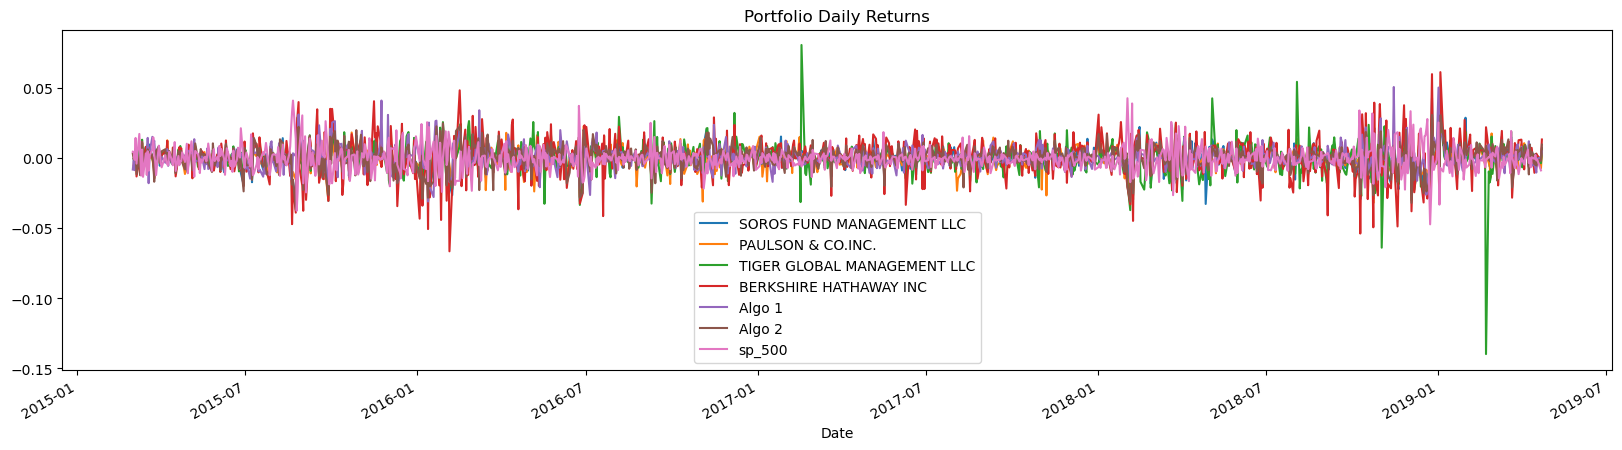

In [15]:
# Plot daily returns of all portfolios
d_returns.plot(figsize=(20,5), title="Portfolio Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

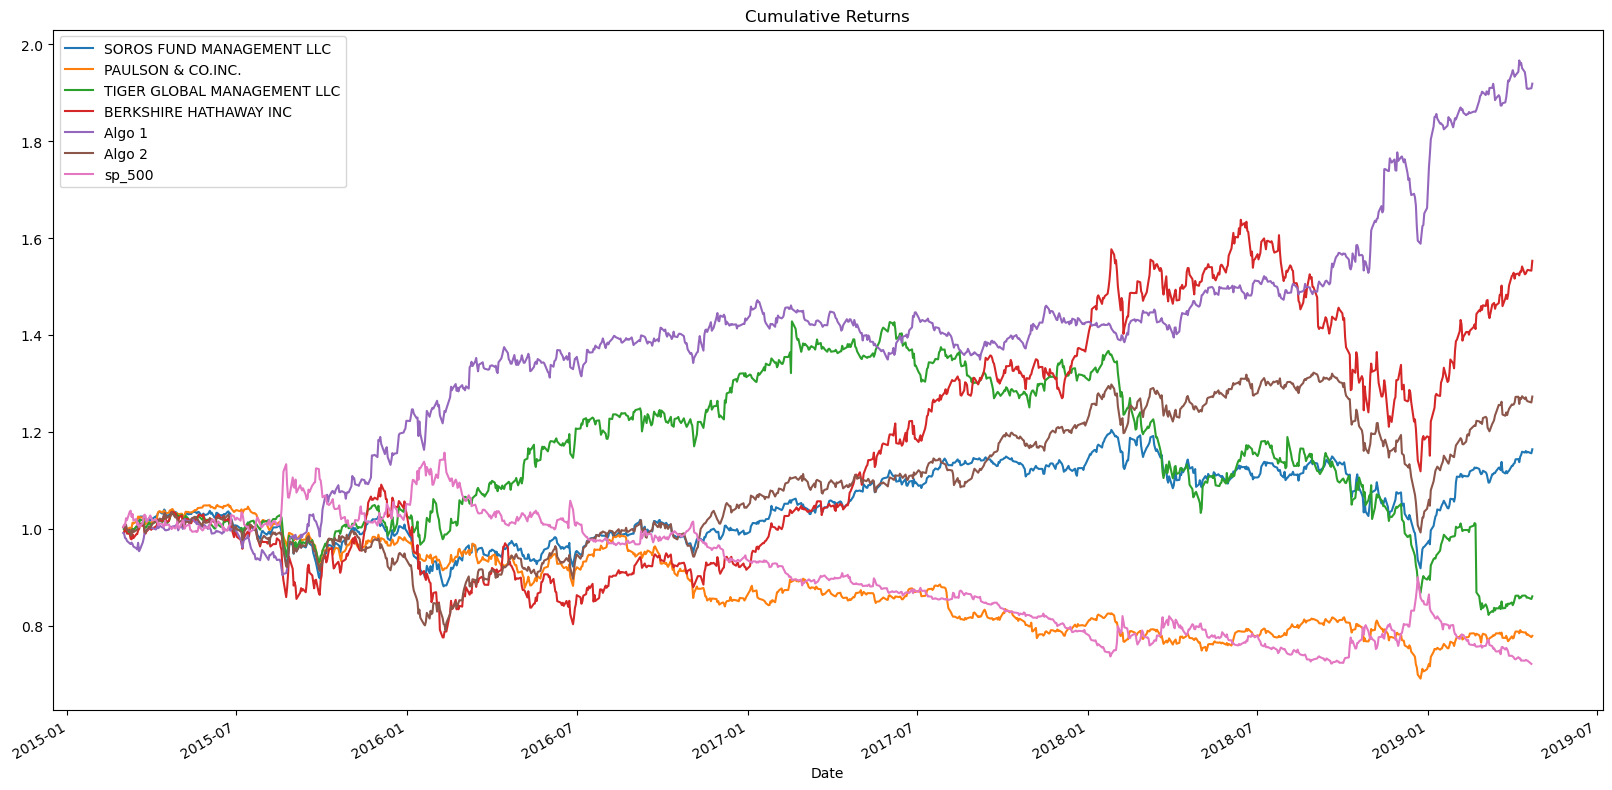

In [16]:
# Calculate cumulative returns of all portfolios
cum_ret= (1+ d_returns).cumprod()
# Plot cumulative returns
cum_ret.plot(figsize=(20,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Risk Box Plot'}>

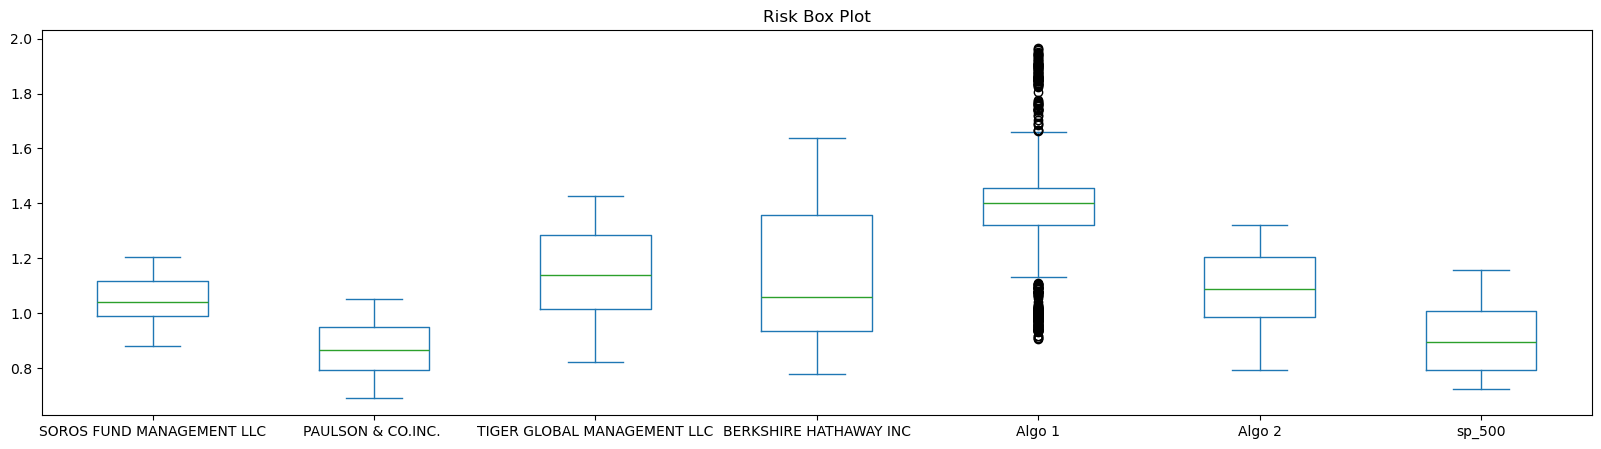

In [17]:
# Box plot to visually show risk
cum_ret.plot.box(figsize=(20,5), title="Risk Box Plot")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
d_std= d_returns.std()


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
s_pdstd= s_pdr.std()
# Determine which portfolios are riskier than the S&P 500
risk_comp=d_std,s_pdstd.sort_values(ascending=False)
risk_comp

(SOROS FUND MANAGEMENT LLC      0.007895
 PAULSON & CO.INC.              0.007023
 TIGER GLOBAL MANAGEMENT LLC    0.010894
 BERKSHIRE HATHAWAY INC         0.012919
 Algo 1                         0.007621
 Algo 2                         0.008339
 sp_500                         0.008584
 dtype: float64,
 sp_500    0.008135
 dtype: float64)

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
ann_std= d_std* np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
sp_500                         0.136268
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21 Day window'}, xlabel='Date'>

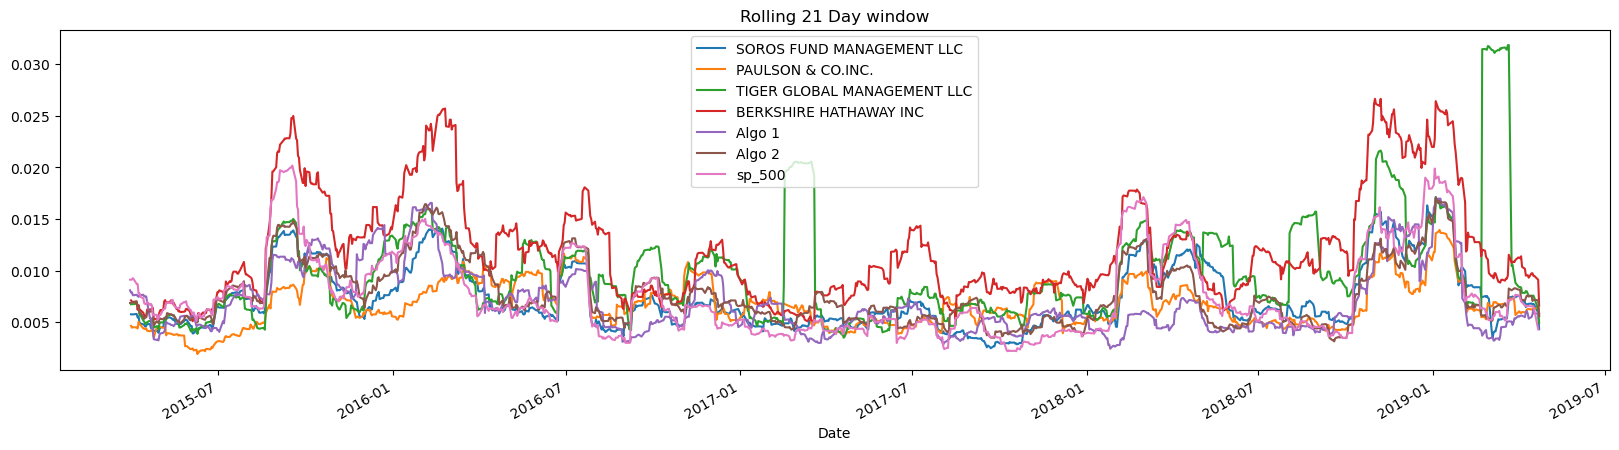

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std= d_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize= (20,5), title="Rolling 21 Day window")

### Calculate and plot the correlation

<Axes: title={'center': 'Portfolio Correlation'}>

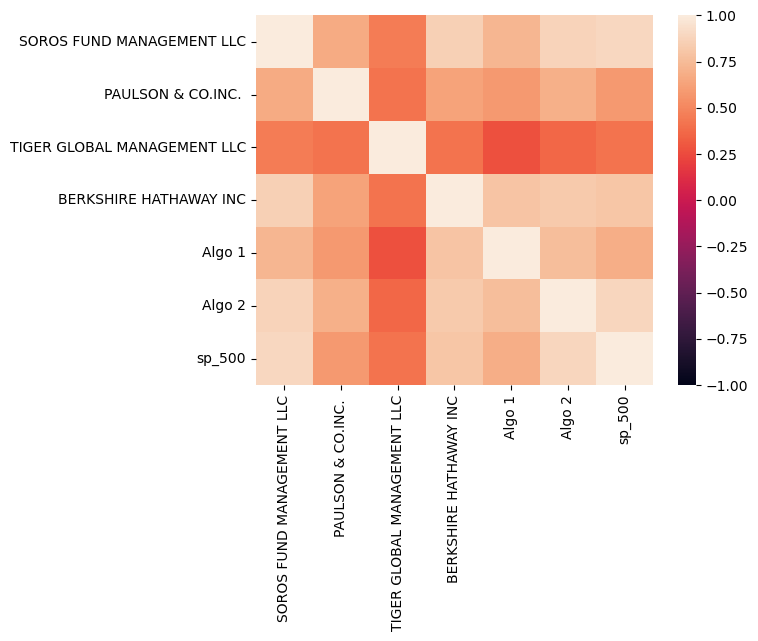

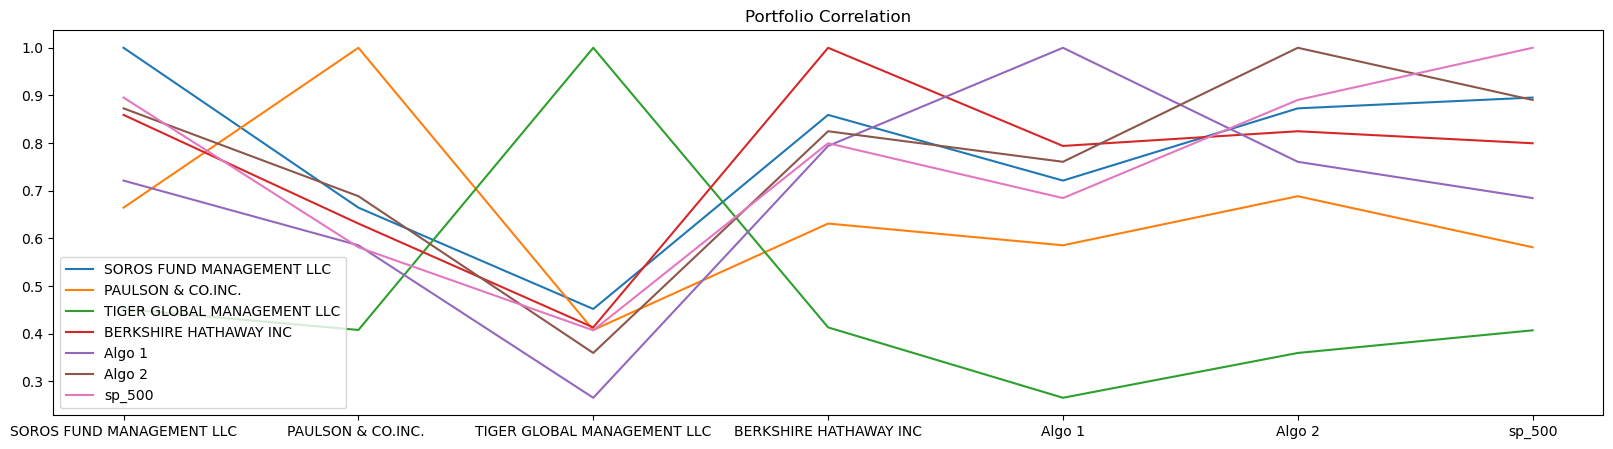

In [22]:
# Calculate the correlation
correl= rolling_std.corr()
# Display de correlation matrix
sns.heatmap(correl, vmin=-1, vmax=1)
correl.plot(figsize=(20,5), title="Portfolio Correlation")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60 Day Beta Algo1 vs SP500'}, xlabel='Date'>

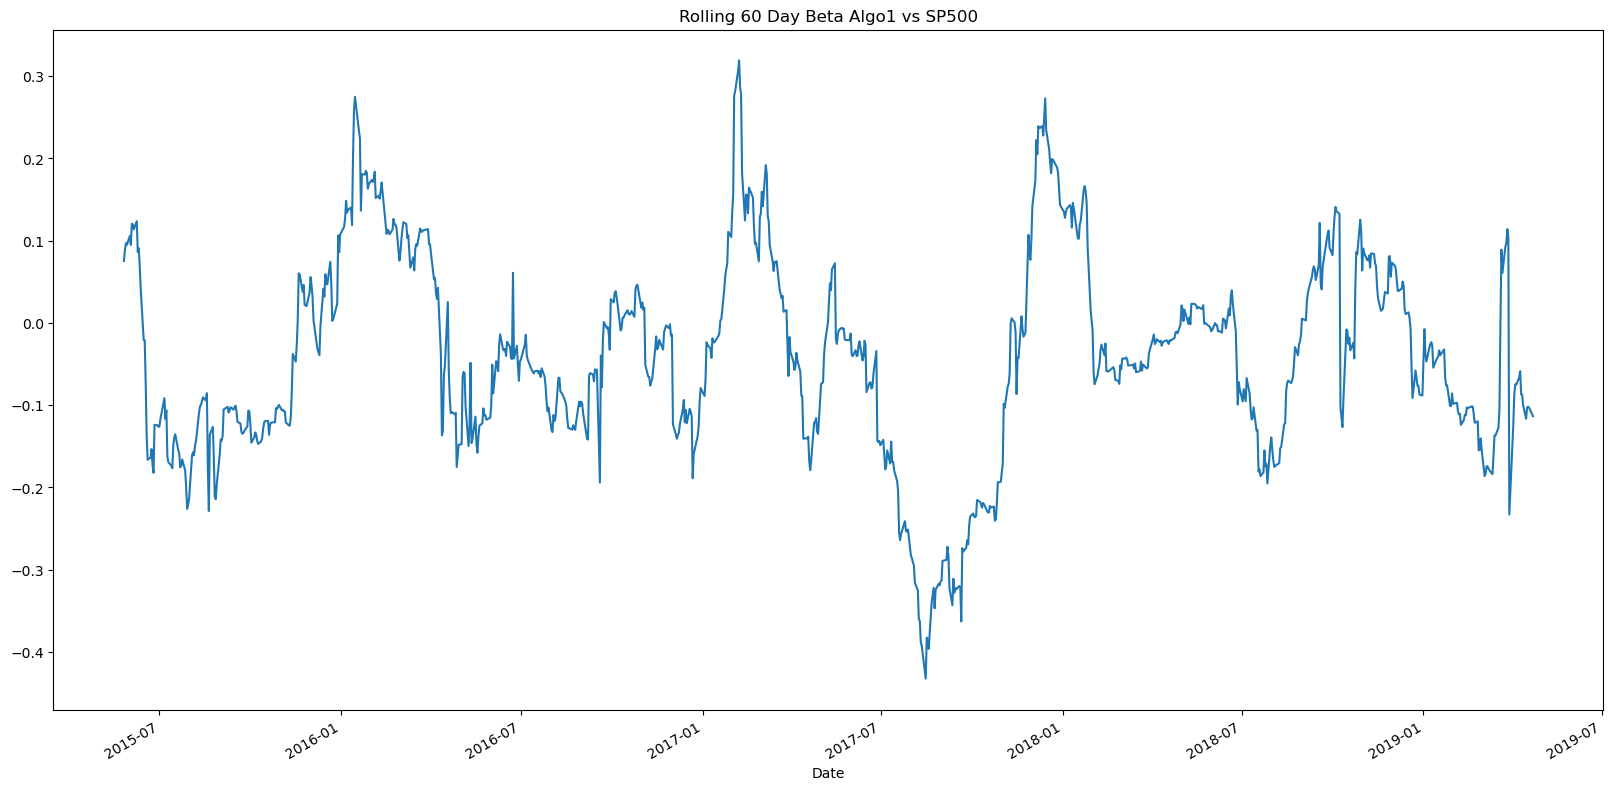

In [23]:
# Calculate covariance of a single portfolio
algo_covar= d_returns['Algo 1'].rolling(window=60).cov(d_returns['sp_500'])
# Calculate variance of S&P 500
sp_var= d_returns['sp_500'].rolling(window=60).var()


# Computing beta
algo1_beta= algo_covar / sp_var
# Plot beta trend
algo1_beta.plot(figsize=(20,10), title='Rolling 60 Day Beta Algo1 vs SP500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
d_std.ewm(halflife=21).mean()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007452
TIGER GLOBAL MANAGEMENT LLC    0.008637
BERKSHIRE HATHAWAY INC         0.009761
Algo 1                         0.009305
Algo 2                         0.009130
sp_500                         0.009044
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios=(d_returns.mean()-d_returns['sp_500'].mean())/(d_returns.std())

<Axes: title={'center': 'Sharpe Ratios'}>

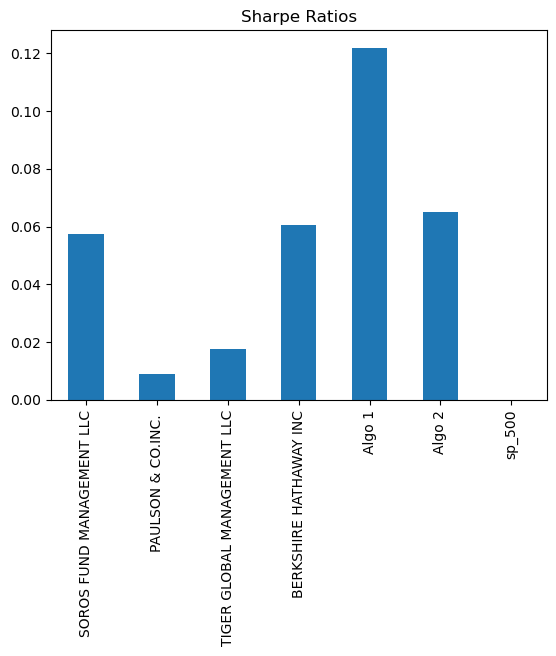

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algorithmic strategies outperformed both the market and slightly outperformed the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
apple= pd.read_csv("./Resources/aapl_historical.csv",
                  index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
apple

C:\Users\reggi\AppData\Local\Temp\ipykernel_34284\1250310210.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  apple= pd.read_csv("./Resources/aapl_historical.csv",


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [28]:
# Reading data from 2nd stock
costco= pd.read_csv("./Resources/cost_historical.csv",
                  index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
costco

C:\Users\reggi\AppData\Local\Temp\ipykernel_34284\1667766926.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  costco= pd.read_csv("./Resources/cost_historical.csv",


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [29]:
# Reading data from 3rd stock
google= pd.read_csv("./Resources/goog_historical.csv",
                  index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
google

C:\Users\reggi\AppData\Local\Temp\ipykernel_34284\3495169758.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  google= pd.read_csv("./Resources/goog_historical.csv",


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [30]:
# Combine all stocks in a single DataFrame
my_port=pd.concat([apple.NOCP,costco.NOCP,google.NOCP], axis="columns", join="outer")
my_port.columns=['AAPL', 'COST','Goog']
my_port.head()

,AAPL,COST,Goog
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [31]:
# Reset Date index
my_port.reset_index()

,Trade DATE,AAPL,COST,Goog
0,2019-05-09,200.72,243.47,1162.38
1,2019-05-08,202.90,241.34,1166.27
2,2019-05-07,202.86,240.18,1174.10
3,2019-05-06,208.48,244.23,1189.39
4,2019-05-03,211.75,244.62,1185.40
...,...,...,...,...
245,2018-05-17,186.99,199.60,1078.59
246,2018-05-16,188.18,198.71,1081.77
247,2018-05-15,186.44,195.48,1079.23
248,2018-05-14,188.15,195.88,1100.20


In [32]:
# Reorganize portfolio data by having a column per symbol
my_port.sort_index(inplace=True)

In [33]:
# Calculate daily returns
myport_dailys=my_port.pct_change()
# Drop NAs
myport_dailys.dropna()
# Display sample data
myport_dailys

,AAPL,COST,Goog
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myport_return= myport_dailys.dot(weights)
# Display sample data
myport_return

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
d_returns['My Portfolio']=myport_return
joined_ports=d_returns
joined_ports.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_500,My Portfolio
Date,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_ports.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_500,My Portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
joined_ports_ann_std=joined_ports.std()*np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': '21 Day Rolling Portfolio Standard Deviation'}, xlabel='Date'>

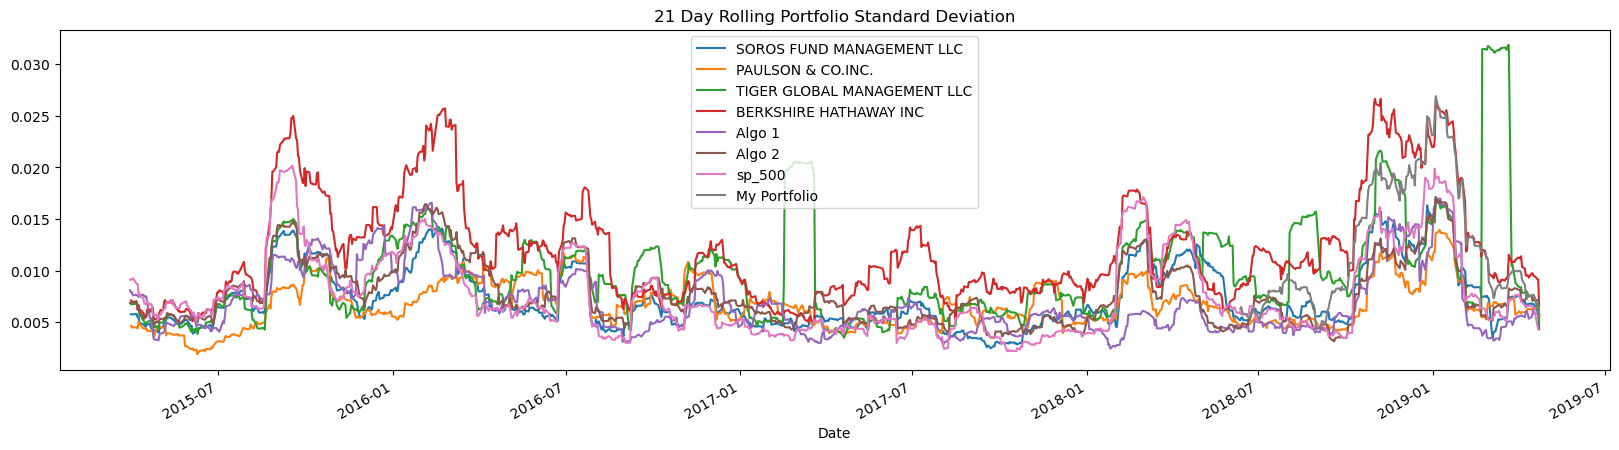

In [38]:
# Calculate rolling standard deviation
joined_rolling= joined_ports.rolling(window=21).std()

# Plot rolling standard deviation
joined_rolling.plot(title="21 Day Rolling Portfolio Standard Deviation", figsize=(20,5))

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation of STD'}>

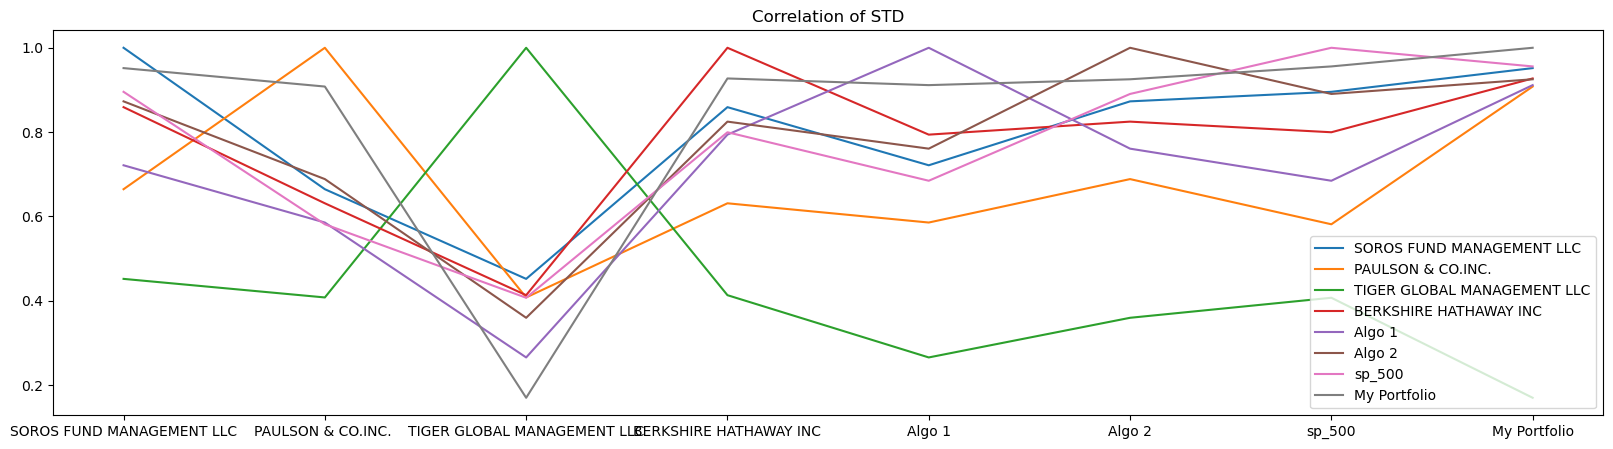

In [39]:
# Calculate and plot the correlation
joined_correlation= joined_rolling.corr()
joined_correlation.plot(figsize=(20,5), title="Correlation of STD")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': '60 Day Rolling Beta'}, xlabel='Date'>

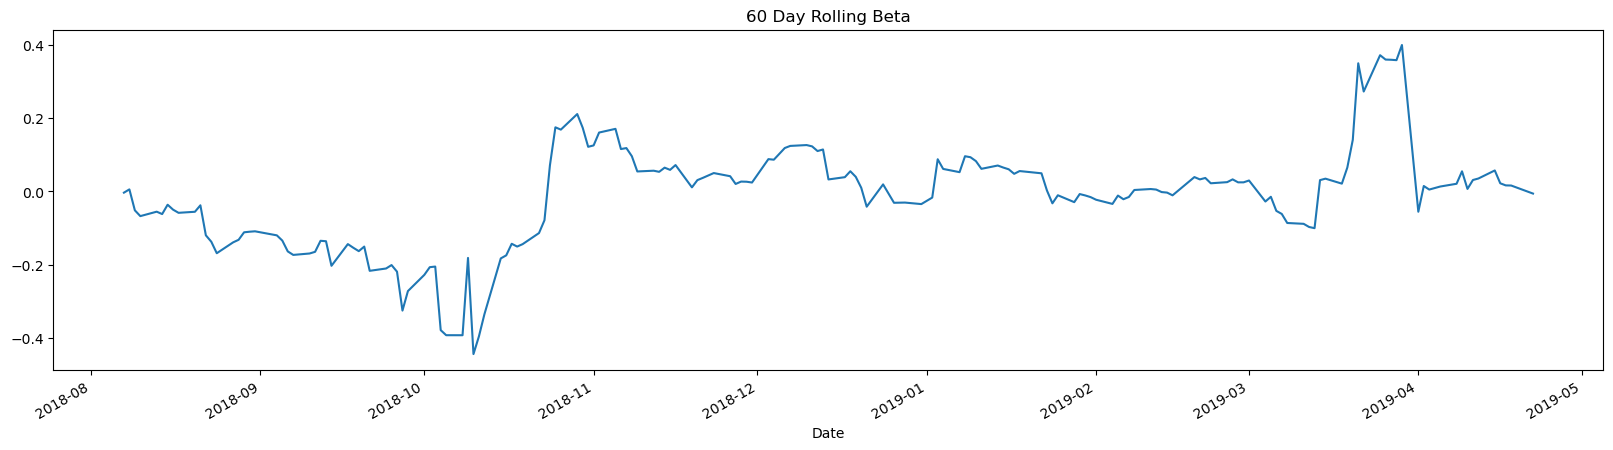

In [40]:
# Calculate and plot Beta
my_covar=joined_ports['My Portfolio'].rolling(window=60).cov(joined_ports['sp_500'])
new_var=joined_ports['sp_500'].rolling(window=60).var()

joined_rolling_beta= my_covar/new_var
joined_rolling_beta.plot(figsize=(20,5), title="60 Day Rolling Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio=(joined_ports.mean()-joined_ports['sp_500'].mean()) * 252 / (joined_ports.std())
sharpe_ratio

SOROS FUND MANAGEMENT LLC      14.463096
PAULSON & CO.INC.               2.222353
TIGER GLOBAL MANAGEMENT LLC     4.459747
BERKSHIRE HATHAWAY INC         15.252307
Algo 1                         30.724126
Algo 2                         16.384206
sp_500                          0.000000
My Portfolio                   20.030918
dtype: float64

<Axes: title={'center': 'Annualized Sharpe Ratios'}>

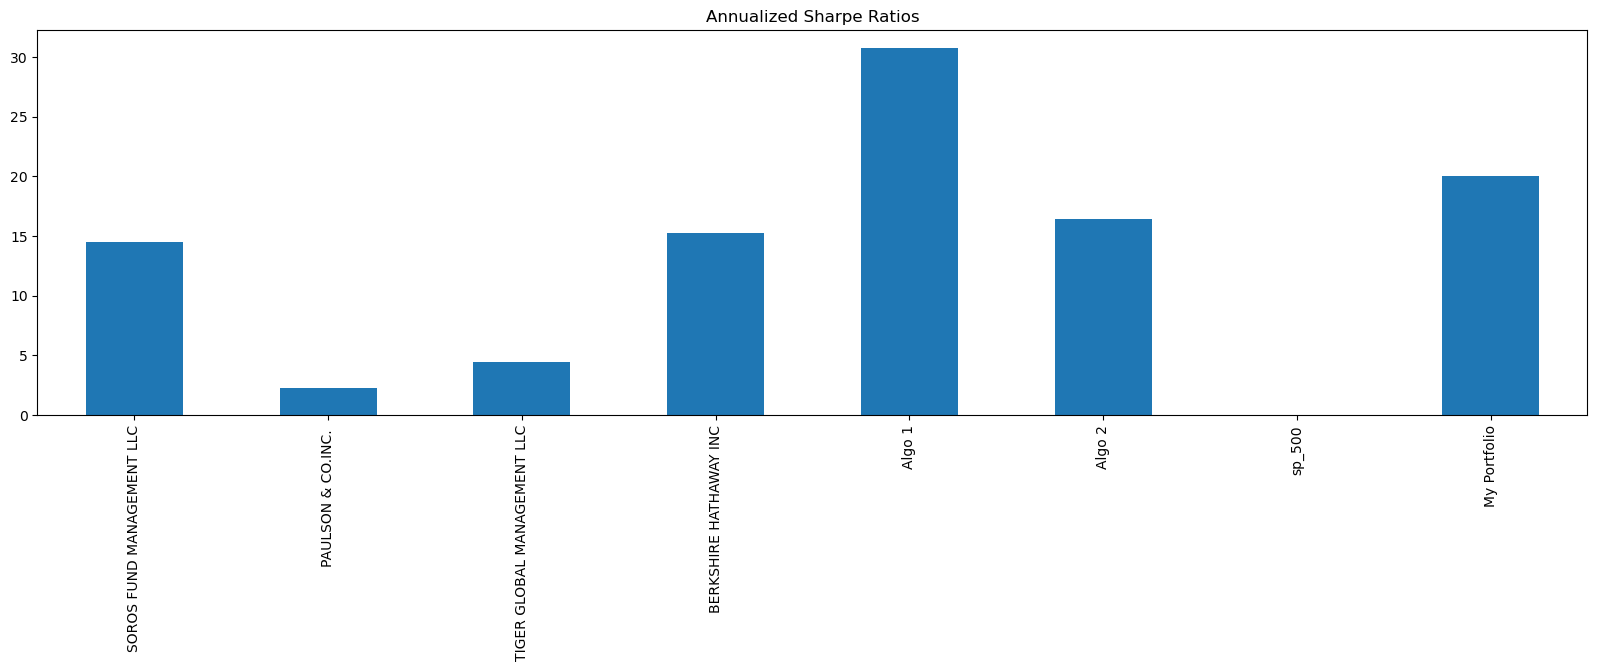

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', figsize=(20,5), title='Annualized Sharpe Ratios')

### How does your portfolio do?

My portfolio did better than the other whales and S&P portfolios except for the Algo 1 portfolio slightly outperformed mine. 